# Explorartory Data Analysis for the discrete stock and crypto currency trading data

### importing the libraries

In [104]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import holidays

%config InlineBackend.figure_format = 'retina'

### exploring the dataset for basic information

In [93]:
cryptoData = pd.read_csv("/Users/romilrathi/Desktop/Crypto_Data.csv")
df_stocks = pd.read_csv("/Users/romilrathi/Desktop/stocks.csv")

In [99]:
print("Earliest Date for Crypto currency", cryptoData['Date'].min())
print("Latest Date for Crypto currency", cryptoData['Date'].max())

Earliest Date for Crypto currency 2013-04-28
Latest Date for Crypto currency 2019-09-28


In [100]:
print("Earliest Date for stocks", df_stocks['Date'].min())
print("Latest Date for stocks", df_stocks['Date'].max())

Earliest Date for stocks 2005-01-03
Latest Date for stocks 2019-08-02


In [103]:
print("Number of Holdings in stocks data:", len(set(df_stocks['ticker'])))
print("Number of Holdings in Crypto data:", len(set(cryptoData['crypto_ticker'])))

Number of Holdings in stocks data: 16
Number of Holdings in Crypto data: 6


In [85]:
#checking null values for stocks dataframe
pd.pivot_table(df_stocks, values ='Close', index =['Date'], columns =['ticker']).isnull().values.any()

False

In [89]:
#Checking the null values for Crypto DataFrame
pd.pivot_table(cryptoData, values ='Close', index =['Date'], columns =['crypto_ticker']).isnull().values.any()

True

In [91]:
crypto_null = pd.pivot_table(cryptoData, values ='Close', index =['Date'], columns =['crypto_ticker'])
crypto_null[crypto_null.isnull().any(axis=1)].sample(5)

crypto_ticker,BTC,ETH,LTC,XEM,XMR,XRP
Date,,,,,,
2014-06-23,593.98,NaN,9.72,NaN,3.980000,0.004085
2014-08-10,591.06,NaN,6.95,NaN,2.060000,0.004975
2014-07-10,616.76,NaN,7.79,NaN,1.890000,0.004074
2014-12-22,331.89,NaN,2.89,NaN,0.344799,0.025562
2014-06-10,653.15,NaN,11.11,NaN,1.730000,0.004547


There are no null values found in Stocks Price Data

There are null values in Crypto Currency Data as some of them were not launched from the time we started collecting the data, thus this data seems to be sparse and need to be handled efficiently.

### collecting the data for week days excluding national holidays

In [111]:
# Select country
us_holidays = holidays.US()

df_stocks['Holiday'] = df_stocks.Date.apply(lambda x: x in us_holidays)
cryptoData['Holiday'] = cryptoData.Date.apply(lambda x: x in us_holidays)

In [112]:
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])
cryptoData['Date'] = pd.to_datetime(cryptoData['Date'])

df_stocks['Day'] = df_stocks['Date'].dt.day_name()
cryptoData['Day'] = cryptoData['Date'].dt.day_name()

In [114]:
df_stocks = df_stocks.loc[df_stocks['Holiday'] == False]
df_stocks = df_stocks.loc[~df_stocks.Day.isin(['Saturday', 'Sunday'])]

In [115]:
crypto_stocks = cryptoData.loc[cryptoData['Holiday'] == False]
cryptoData = crypto_stocks.loc[~crypto_stocks.Day.isin(['Saturday', 'Sunday'])]

### calculating the returns for stocks and crypto currency data

In [52]:
list_of_stock = []
crypto_data = []

for tick in list(set(df_stocks['ticker'])):
    df = df_stocks.loc[df_stocks['ticker'] == tick]
    df['daily return'] = df['Close'].pct_change(1)
    list_of_stock.append(df)
    

for ticker in list(set(cryptoData['crypto_ticker'])):
    temp = cryptoData.loc[cryptoData['crypto_ticker'] == ticker]
    temp["crypto returns"] = temp['Close'].pct_change()
    crypto_data.append(temp)
    
cryptoData = pd.concat(crypto_data)
returns_stocks = pd.concat(list_of_stock)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
for ticker in list(set(returns_stocks['ticker'])):
    temp = returns_stocks.loc[returns_stocks['ticker'] == ticker]
    print(ticker+' has data for '+str(len(set(temp.index)))+' days')

VZ has data for 3671 days
AAPL has data for 3671 days
BA has data for 3671 days
STT has data for 3671 days
TGT has data for 3671 days
KO has data for 3671 days
GOOGL has data for 3671 days
MSFT has data for 3671 days
SPG has data for 3671 days
XOM has data for 3671 days
XEL has data for 3671 days
WMT has data for 3671 days
AMZN has data for 3671 days
UNH has data for 3671 days
JPM has data for 3671 days
VMC has data for 3671 days


In [54]:
for ticker in list(set(cryptoData['crypto_ticker'])):
    temp = cryptoData.loc[cryptoData['crypto_ticker'] == ticker]
    print(ticker+' has data for '+str(len(set(temp.index)))+' days')

XEM has data for 1642 days
XMR has data for 1956 days
XRP has data for 2247 days
ETH has data for 1514 days
LTC has data for 2345 days
BTC has data for 2345 days


### Plotting interactive returns for discrete crypto currency and stocks data for different years

In [4]:
# Reshaping data
cryptoData['Date'] = pd.to_datetime(cryptoData['Date'])
filter_mask = cryptoData['Date'] > pd.Timestamp(2016, 1, 1)
filtered_df = cryptoData[filter_mask]
cryptoDataReshaped = filtered_df.pivot(index='Date', columns='crypto_ticker', values='crypto returns')

In [5]:
cryptoDataReshaped = cryptoDataReshaped.reset_index()

In [6]:
cryptoDataReshaped.tail()

crypto_ticker,Date,BTC,ETH,LTC,XEM,XMR,XRP
1361,2019-09-24,0.015739,-0.016268,-0.031911,-0.031677,-0.010692,-0.045508
1362,2019-09-25,0.045328,0.024951,0.038171,-0.040570,0.039778,0.010899
1363,2019-09-26,-0.016103,-0.045676,-0.014549,0.016316,-0.008098,-0.000971
1364,2019-09-27,0.000719,0.000802,0.012213,0.004777,0.001035,0.005978
1365,2019-09-28,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Showing muliple currencies on the same graph

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=cryptoDataReshaped.Date,
                y=cryptoDataReshaped['BTC'],
                name="Bitcoin",
                line_color='red',
                opacity=0.5))

fig.add_trace(go.Scatter(
                x=cryptoDataReshaped.Date,
                y=cryptoDataReshaped['ETH'],
                name="Ethereum",
                line_color='blue',
                opacity=0.5))

fig.add_trace(go.Scatter(
                x=cryptoDataReshaped.Date,
                y=cryptoDataReshaped['LTC'],
                name="Litecoin",
                line_color='green',
                opacity=0.5))



# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2019-01-01','2019-10-01'],
                 title_text = 'Returns for discrete crypto currencies [Year - 2019]')
fig.update_yaxes(title_text = 'Returns')
fig.update_xaxes(title_text = 'Time period')
fig.show()

In [34]:
# Showing muliple currencies on the same graph

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=cryptoDataReshaped.Date,
                y=cryptoDataReshaped['BTC'],
                name="Bitcoin",
                line_color='red',
                opacity=0.5))

fig.add_trace(go.Scatter(
                x=cryptoDataReshaped.Date,
                y=cryptoDataReshaped['ETH'],
                name="Ethereum",
                line_color='blue',
                opacity=0.5))

fig.add_trace(go.Scatter(
                x=cryptoDataReshaped.Date,
                y=cryptoDataReshaped['LTC'],
                name="Litecoin",
                line_color='green',
                opacity=0.5))



# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2018-01-01','2018-12-31'],
                  title_text = 'Returns for discrete crypto currencies [Year - 2018]')
fig.update_yaxes(title_text = 'Returns')
fig.update_xaxes(title_text = 'Time period')
fig.show()

In [35]:
# Showing muliple currencies on the same graph

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=cryptoDataReshaped.Date,
                y=cryptoDataReshaped['BTC'],
                name="Bitcoin",
                line_color='red',
                opacity=0.5))

fig.add_trace(go.Scatter(
                x=cryptoDataReshaped.Date,
                y=cryptoDataReshaped['ETH'],
                name="Ethereum",
                line_color='blue',
                opacity=0.5))

fig.add_trace(go.Scatter(
                x=cryptoDataReshaped.Date,
                y=cryptoDataReshaped['LTC'],
                name="Litecoin",
                line_color='green',
                opacity=0.5))



# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2017-01-01','2017-12-31'],
                  title_text = 'Returns for discrete crypto currencies [Year - 2017]')
fig.update_yaxes(title_text = 'Returns')
fig.update_xaxes(title_text = 'Time period')
fig.show()

In [36]:
# Showing muliple currencies on the same graph

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=cryptoDataReshaped.Date,
                y=cryptoDataReshaped['BTC'],
                name="Bitcoin",
                line_color='red',
                opacity=0.5))

fig.add_trace(go.Scatter(
                x=cryptoDataReshaped.Date,
                y=cryptoDataReshaped['ETH'],
                name="Ethereum",
                line_color='blue',
                opacity=0.5))

fig.add_trace(go.Scatter(
                x=cryptoDataReshaped.Date,
                y=cryptoDataReshaped['LTC'],
                name="Litecoin",
                line_color='green',
                opacity=0.5))



# Use date string to set xaxis range
fig.update_layout(xaxis_range=['2016-01-01','2016-12-31'],
                  title_text = 'Returns for discrete crypto currencies [Year - 2016]')
fig.update_yaxes(title_text = 'Returns')
fig.update_xaxes(title_text = 'Time period')
fig.show()

,Date,Open,High,Low,Close,ticker,Holiday,Day,monthly_return,daily return
0,2005-01-03,4.627143,4.650714,4.471428,4.520714,AAPL,False,Monday,NaN,NaN
1,2005-01-04,4.556428,4.676429,4.497857,4.567143,AAPL,False,Tuesday,NaN,0.010270
2,2005-01-05,4.604286,4.660714,4.575000,4.607143,AAPL,False,Wednesday,NaN,0.008758
3,2005-01-06,4.619286,4.636428,4.523571,4.610714,AAPL,False,Thursday,NaN,0.000775
4,2005-01-07,4.642857,4.973571,4.625000,4.946429,AAPL,False,Friday,NaN,0.072812
...,...,...,...,...,...,...,...,...,...,...
58731,2019-07-29,158.779999,160.929993,158.779999,159.639999,SPG,False,Monday,-0.001813,0.008274
58732,2019-07-30,159.479996,160.750000,159.449997,160.210007,SPG,False,Tuesday,0.002817,0.003571
58733,2019-07-31,162.500000,164.460007,160.559998,162.199997,SPG,False,Wednesday,0.022441,0.012421
58734,2019-08-01,161.009995,161.410004,157.360001,157.479996,SPG,False,Thursday,-0.027601,-0.029100


In [14]:
# Reshaping data

returns_stocks['Date'] = pd.to_datetime(returns_stocks['Date'])
filter_mask = returns_stocks['Date'] > pd.Timestamp(2016, 1, 1)
filtered_df = returns_stocks[filter_mask]
returns_stocks_reshaped = filtered_df.pivot(index='Date', columns='ticker', values='daily return')
returns_stocks_reshaped = returns_stocks_reshaped.reset_index()

In [37]:
# Showing muliple currencies on the same graph

fig = go.Figure()

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['AAPL'],
                name = "Apple",
                line_color ='red',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['STT'],
                name = "State Street Corp.",
                line_color ='blue',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['XOM'],
                name = "Exxon",
                line_color ='green',
                opacity = 0.5))



# Use date string to set xaxis range
fig.update_layout(xaxis_range = ['2019-01-01','2019-09-01'],
                  title_text = 'Returns for discrete stocks [Year - 2019]')
fig.update_yaxes(title_text = 'Returns')
fig.update_xaxes(title_text = 'Time period')
fig.show()

In [38]:
fig = go.Figure()

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['AAPL'],
                name = "Apple",
                line_color ='red',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['STT'],
                name = "State Street Corp.",
                line_color ='blue',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['XOM'],
                name = "Exxon",
                line_color ='green',
                opacity = 0.5))



# Use date string to set xaxis range
fig.update_layout(xaxis_range = ['2018-01-01','2018-12-31'],
                  title_text = 'Returns for discrete stocks [Year - 2018]')
fig.update_yaxes(title_text = 'Returns')
fig.update_xaxes(title_text = 'Time period')
fig.show()

In [40]:
fig = go.Figure()

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['AAPL'],
                name = "Apple",
                line_color ='red',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['STT'],
                name = "State Street Corp.",
                line_color ='blue',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['XOM'],
                name = "Exxon",
                line_color ='green',
                opacity = 0.5))



# Use date string to set xaxis range
fig.update_layout(xaxis_range = ['2017-01-01','2017-12-31'],
                  title_text = 'Returns for discrete stocks [Year - 2017]')
fig.update_yaxes(title_text = 'Returns')
fig.update_xaxes(title_text = 'Time period')

fig.show()

In [39]:
fig = go.Figure()

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['AAPL'],
                name = "Apple",
                line_color ='red',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['STT'],
                name = "State Street Corp.",
                line_color ='blue',
                opacity = 0.5))

fig.add_trace(go.Scatter(
                x = returns_stocks_reshaped.Date,
                y = returns_stocks_reshaped['XOM'],
                name = "Exxon",
                line_color ='green',
                opacity = 0.5))



# Use date string to set xaxis range
fig.update_layout(xaxis_range = ['2016-01-01','2016-12-31'],
                  title_text = 'Returns for discrete stocks [Year - 2016]')
fig.update_yaxes(title_text = 'Returns')
fig.update_xaxes(title_text = 'Time period')
fig.show()

### generating heat maps /  correlation plots

In [57]:
df_stocks.set_index('Date', inplace=True)
cryptoData.set_index('Date', inplace=True)

In [58]:
corr_df = pd.pivot_table(df_stocks, values ='Close', index =['Date'], columns =['ticker'])
corr_crypto = pd.pivot_table(cryptoData, values ='Close', index =['Date'], columns =['crypto_ticker'])

In [59]:
correlation_stocks = corr_df.corr()
correlation_crypto = corr_crypto.corr()

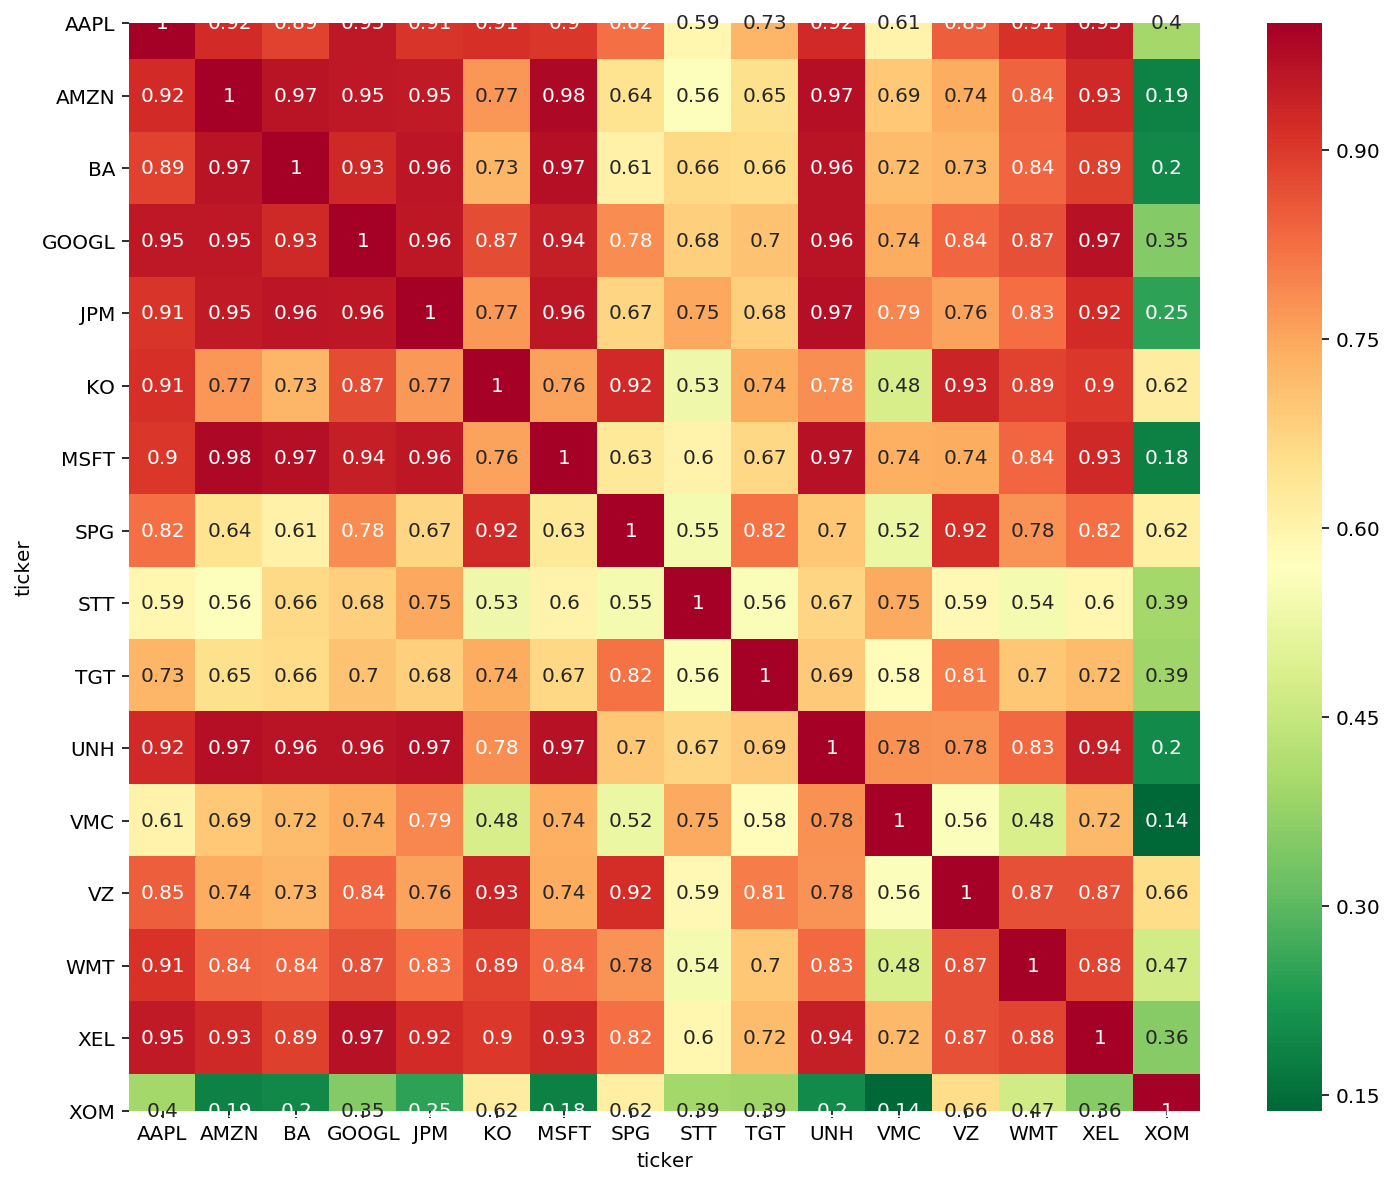

In [70]:
plt.figure(figsize=(12, 10))
sns_plot = sns.heatmap(correlation_stocks, annot=True, cmap="RdYlGn_r")
plt.savefig('Correlation.png')

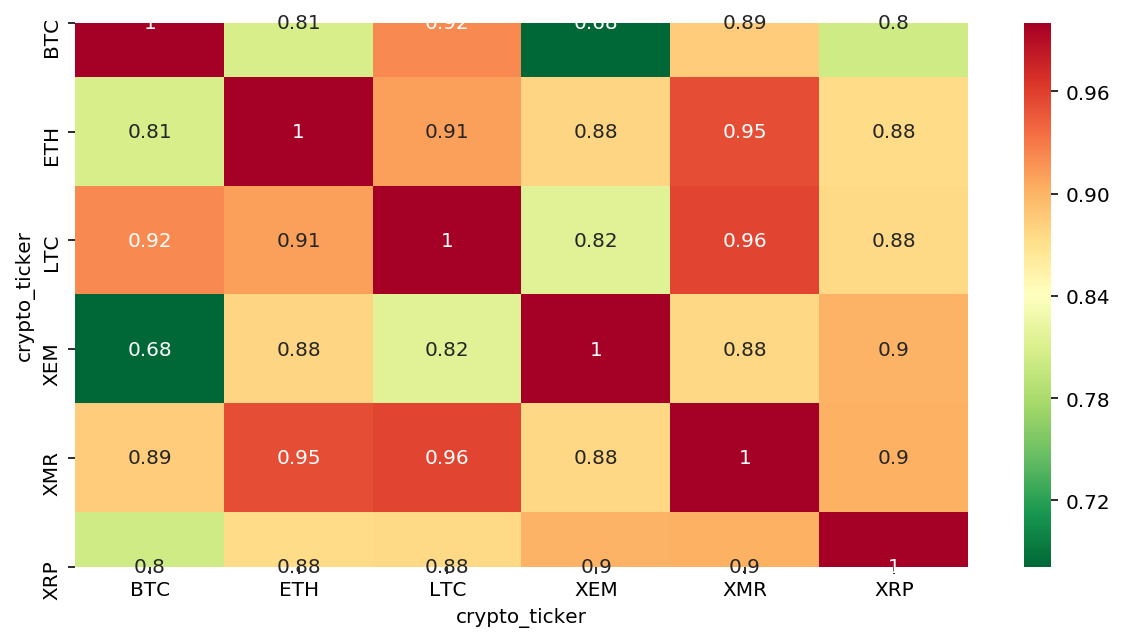

In [71]:
plt.figure(figsize=(10, 5))
sns_plot = sns.heatmap(correlation_crypto, annot=True, cmap="RdYlGn_r")
plt.savefig('Correlation_crypto.png')